In [117]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
data=pd.read_csv("D:/data analysis class/houseprice.csv")

In [3]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [79]:
null=data.loc[:,data.isna().any()]

In [80]:
null.head()

,Alley,FireplaceQu,PoolQC,Fence,MiscFeature
0,NaN,NaN,NaN,NaN,NaN
1,NaN,TA,NaN,NaN,NaN
2,NaN,TA,NaN,NaN,NaN
3,NaN,Gd,NaN,NaN,NaN
4,NaN,TA,NaN,NaN,NaN


In [81]:
data.interpolate(method='krogh', axis=0,limit_direction='both',inplace=True)


In [98]:
data.loc[:,data.isna().any()]

""
0
1
2
3
4
...
1455
1456
1457
1458


In [84]:
data.Alley.mode()

0    Grvl
dtype: object

In [87]:
data.FireplaceQu.mode()

0    Gd
dtype: object

In [88]:
data.FireplaceQu.fillna('Gd',inplace=True)

In [90]:
data.PoolQC.mode()

0    Ex
dtype: object

In [91]:
data.PoolQC.fillna('Ex',inplace=True)

In [93]:
data.Fence.mode()

0    MnPrv
dtype: object

In [94]:
data.Fence.fillna('MnPrv',inplace=True)

In [96]:
data.MiscFeature.mode()

0    Shed
dtype: object

In [97]:
data.MiscFeature.fillna('Shed',inplace=True)

In [104]:
Y=data.SalePrice

In [106]:
x=data.drop('SalePrice',axis=1)

In [110]:
data_x=pd.get_dummies(x)

In [111]:
scalar=StandardScaler()

In [112]:
X=scalar.fit_transform(data_x)

In [114]:
X=pd.DataFrame(X)

In [115]:
X.columns=data_x.columns

In [116]:
X.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=289)

In [118]:
pca = PCA()

In [119]:
pca.fit(X)

PCA()

In [120]:
ratio=pca.explained_variance_ratio_

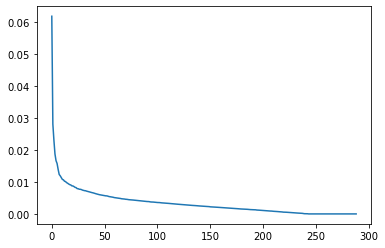

In [121]:
plt.plot(ratio)

In [122]:
CumSum=np.cumsum(ratio)

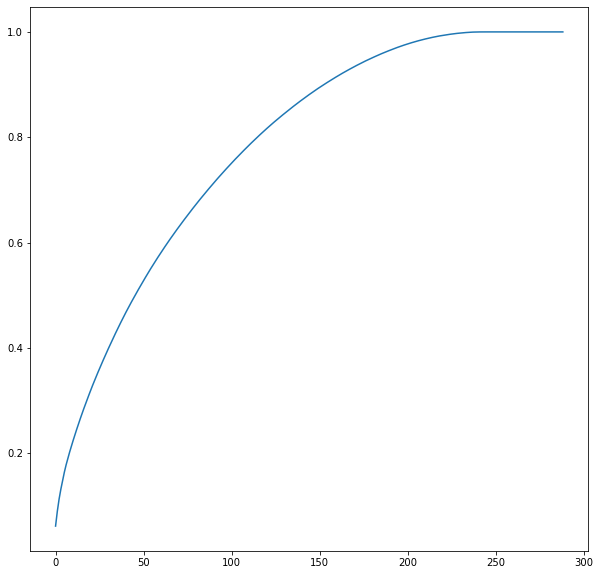

In [125]:
plt.figure(figsize=(10,10))
plt.plot(CumSum)

In [132]:
CumSum[214:216]

array([0.98969998, 0.99041475])

In [137]:
model= PCA(n_components=214)

In [139]:
model=model.fit_transform(X)

In [141]:
model=pd.DataFrame(model)